## 0. Introduction

The purpose of this notebook is to explore Bayesian inference with reference to chapter 11 from *All of Statistics* (Wasserman, 2004).

## 1. The Bayesian Method

The statistical methods that we have discussed so far are known as **frequentist (or classical)** methods. The fundamental idea is to make inferences about a population based on the observed frequencies or proportions in a sample. In contrast, **Bayesian inference** embraces a subjective notion of probability treating it as a measure of belief or uncertainty.

Bayesian inference is usually carried out in the following way:

1. We choose a probability density $f(\theta)$ — called the **prior distribution** — that expresses our beliefs about a parameter $\theta$ before we see any data.

2. We choose a statistical model $f(x \mid \theta)$ that reflects our beliefs about $x$ given $\theta$. Notice that we now write this as $f(x \mid \theta)$ instead of $f(x; \theta)$.

3. After observing data $X_1, \ldots, X_n$, we update our beliefs and calculate the **posterior distribution** $f(\theta \mid X_1, \ldots, X_n)$.

To see how the third step is carried out, first suppose that $\theta$ is discrete and that there is a single, discrete observation $X$. We should use a capital now to denote the parameter since we are treating it like a random variable, so let $\Theta$ denote the parameter. Now, in this discrete setting,

$$
\mathbb{P}(\Theta = \theta \mid X = x) = \frac{\mathbb{P}(X = x, \Theta = \theta)}{\mathbb{P}(X = x)} 
= \frac{\mathbb{P}(X = x \mid \Theta = \theta) \, \mathbb{P}(\Theta = \theta)}{\sum_{\theta} \mathbb{P}(X = x \mid \Theta = \theta) \, \mathbb{P}(\Theta = \theta)}
$$

which you may recognize from the Probability notebook as **Bayes’ theorem**. The version for continuous variables is obtained by using density functions:

$$ f(\theta \mid x) = \frac{f(x \mid \theta) \, f(\theta)}{\int f(x \mid \theta) \, f(\theta) \, d\theta}. $$

If we have $n$ IID observations $X_1, \ldots, X_n$, we replace $f(x \mid \theta)$ with

$$ f(x_1, \ldots, x_n \mid \theta) = \prod_{i=1}^{n} f(x_i \mid \theta) = \mathcal{L}_n(\theta). $$

We will write $X^n$ to mean $(X_1, \ldots, X_n)$ and $x^n$ to mean $(x_1, \ldots, x_n)$. Now,

$$
f(\theta \mid x^n) = \frac{f(x^n \mid \theta) f(\theta)}{\int f(x^n \mid \theta) f(\theta) d\theta} = \frac{\mathcal{L}_n(\theta) f(\theta)}{c_n} \propto \mathcal{L}_n(\theta) f(\theta)
$$

where 

$$ c_n = \int \mathcal{L}_n(\theta) f(\theta) \, d\theta $$

is called the **normalizing constant**. Note that $c_n$ does not depend on $\theta$. We can summarize by writing: **Posterior is proportional to Likelihood times Prior**, or in symbols,

$$ f(\theta \mid x^n) \propto \mathcal{L}(\theta) f(\theta). $$

You might wonder, doesn’t it cause a problem to throw away the constant $c_n$? The answer is that we can always recover the constant later if we need to.

What do we do with the posterior distribution? First, we can get a point estimate by summarizing the center of the posterior. Typically, we use the mean or mode of the posterior. The posterior mean is

$$ 
\bar{\theta}_n = \int \theta f(\theta \mid x^n) d\theta = \frac{\int \theta \mathcal{L}_n(\theta) f(\theta)}{\int \mathcal{L}_n(\theta) f(\theta) d\theta}. 
$$

We can also obtain a Bayesian interval estimate. We find $a$ and $b$ such that $ \int_{-\infty}^{a} f(\theta \mid x^n) \, d\theta = \int_{b}^{\infty} f(\theta \mid x^n) \, d\theta = \alpha / 2. $
Let $C = (a, b)$. Then

$$ \mathbb{P}(\theta \in C \mid x^n) = \int_{a}^{b} f\left(\theta \mid x^n\right) \, d\theta = 1 - \alpha $$

so $C$ is a $1 − \alpha$ **posterior interval**.

Let's consider an example. Start with a Beta distribution as our prior and simulate $1000$ coin flips. For various numbers of flips (e.g., $0, 1, 5, 10$, etc.), compute and plot the posterior distribution of the probability of heads.

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

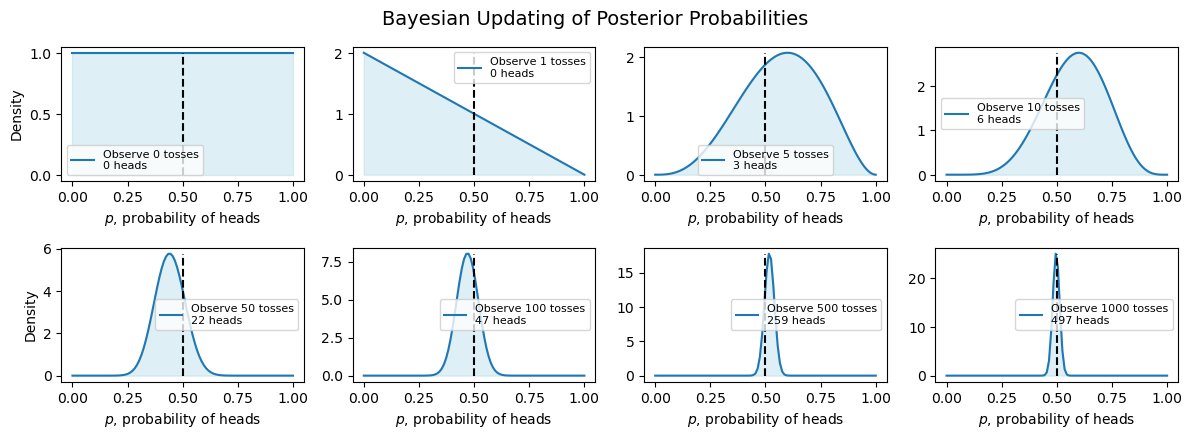

In [2]:
# Solve in python
dist = ss.beta                                                        # Beta distribution for posterior
n_trials = [0, 1, 5, 10, 50, 100, 500, 1000]                          # number of trials
data = ss.bernoulli.rvs(p=0.5, size=n_trials[-1], random_state=42)    # simulate coin flips
x = np.linspace(0, 1, 100)                                            # points at which to evaluate the Beta pdf

# Plot the posterior distribution~
plt.figure(figsize=(12, 6))
for k, N in enumerate(n_trials):
    plt.subplot(3, 4, k + 1)
    heads = data[:N].sum()                                            # number of heads in the first N flips
    y = dist.pdf(x, a=1+heads, b=1+N-heads)                           # posterior distribution
    plt.plot(x, y, label=f"Observe {N} tosses\n{heads} heads")    
    plt.fill_between(x, 0, y, color='lightblue', alpha=0.4)
    plt.vlines(0.5, 0, max(y), color='k', linestyles='--')            # true probability line
    plt.xlabel('$p$, probability of heads')
    plt.ylabel('Density') if k % 4 == 0 else None
    plt.legend(fontsize=8)
plt.suptitle('Bayesian Updating of Posterior Probabilities', fontsize=14)
plt.tight_layout()
plt.show()

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe more data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of $p=0.5$ (marked by a dashed line).